In [137]:
import sys
sys.path.append('../')
from GMM.gmm import GMM
import numpy as np
import scipy.linalg as lin

In [138]:
mod1 = GMM( nz=3, nx=5, prior_z = [0.8,0.15,0.05] )
mod1.mu_x[:,1]=[0.2,1,-1]
mod1.mu_x[2,:]=[0.9,3,1,3,-1]
mod1.mu_x[0,:]=[-1,-.2,.3,-2,1]

for kk in [1,2]:
    v = np.random.randn(mod1.nx,mod1.nx)
    v = v/lin.norm(v,axis=0)
    e = np.random.rand(mod1.nx)*1.5
    mod1.sigma_x[kk] = v @ np.diag(e) @ v.T

In [160]:
mod2 = GMM(nz=mod1.nz, nx=mod1.nx, prior_z=[0.2,0.3,0.5])


In [161]:
T = 1000
Z, X = mod1.sample(T=T)

In [162]:
#ll0 = mod2.get_ll(X)
gm = mod2.e_step(X)
#mod2.m_step(X,gm)
#ll1 = mod2.get_ll(X)

In [163]:
logL = mod2.fit_params(X, n_steps=0,tol=0.03)

increase = 5630.800480750388
increase = 651.5670318663074
increase = 1445.0158448124575
increase = 350.72688339108333
increase = 40.73653625162194
increase = 25.346882076068937
increase = 30.102963600237672
increase = 32.89810388242222
increase = 31.22104649486971
increase = 20.19942064181805
increase = 13.652868158086676
increase = 21.070133317728505
increase = 14.386159503127601
increase = 2.508970014234251
increase = 0.01456603996746253


In [164]:
mod2.prior_z
states_order=np.argsort(1/mod2.prior_z)
mod2.prior_z[states_order]

array([0.80090289, 0.14709534, 0.05200177])

In [144]:
import matplotlib.pyplot as pp

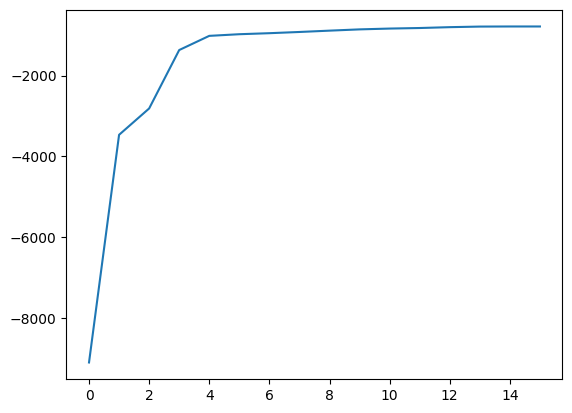

In [165]:
pp.plot(logL)

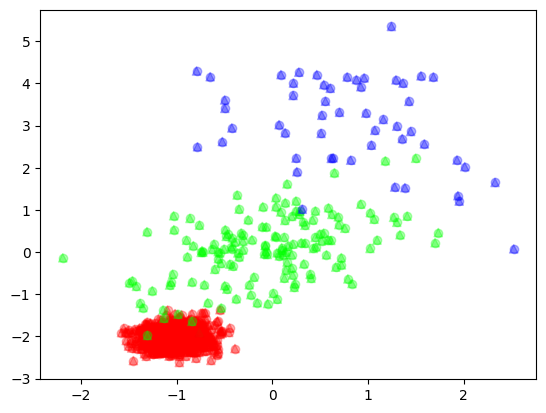

In [172]:
gm = mod2.e_step(X)

xx=0
yy=3
for kk in range(mod2.nz):
    use_t = np.where(Z==kk)[0]
    c=[0,0,0]
    c[kk]=1
    pp.scatter(X[use_t,xx],X[use_t,yy], color=c, alpha=0.3 )
    pp.scatter(X[use_t,xx], X[use_t,yy], marker='^', c=gm[np.ix_(use_t,states_order)], alpha=0.3)



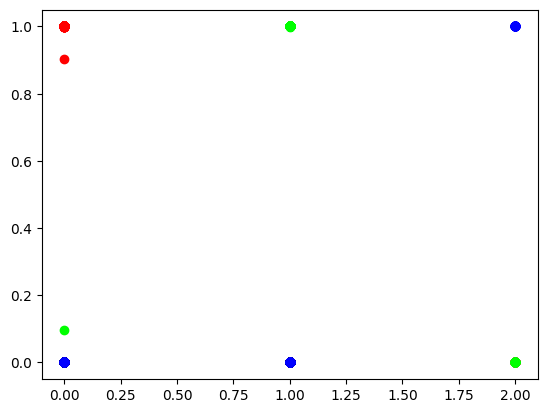

In [167]:
for kk in range(mod1.nz):
    cc=[0,0,0]
    cc[kk]=1
    pp.scatter(Z,gm[:,states_order[kk]],color=cc)

In [148]:
np.nanmedian(mod1.sigma_x-mod2.sigma_x[states_order,:])

0.0003835195658790924

In [149]:
idx=0
mod1.sigma_x[idx] - np.int_(mod2.sigma_x[states_order[idx]]*100)/100

array([[0.00380663, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00380663, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00380663, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00380663, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00380663]])